In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from os import path
os.chdir('..')
import pandas as pd
from torchvision.transforms.functional import to_pil_image
from torch.utils.data import DataLoader

In [208]:
from torch.nn.functional import sigmoid
from torch.optim import Adam
import torch

In [3]:
available = ['ISIC_0052212','ISIC_0068279','ISIC_0076262']
df = pd.read_csv('./data/labels/train.csv')
df = df[df.image_name.isin(available)]
df.to_csv('./data/labels/sandbox.csv')
#pd.read_csv('../data/labels/sandbox.csv')

In [234]:
from model.data import MelanomaDataset
from model import model as model_pkg

In [247]:
imgs_dir = path.normpath(path.join(os.getcwd(),'data/jpeg/train'))
csv_path = path.normpath(path.join(os.getcwd(),'data/labels/sandbox.csv'))
mds = MelanomaDataset(imgs_dir=imgs_dir, label_csv = csv_path, train = True)
mdl = DataLoader(mds, batch_size = 3, shuffle=True)
model = model_pkg.MelanomaNet()

device:  cpu
block type:  basic
blocks per stage:  3


In [248]:
# Try overfitting a batch to make sure the model + optimizer is operating properly
optimizer = Adam(model.parameters(), lr=0.005)
EPOCHS = 15
losses = []
for i in range(EPOCHS):
    for i, batch in enumerate(mdl):
        assert model.training
        #zero the optimizer
        optimizer.zero_grad()

        x, y = batch
        #with torch.no_grad():
        #    model.eval()
        #    print(model.predict(x))
        #    model.train()
        a = model(x)
        a = sigmoid(a)
        loss = (a-y)**2
        loss = loss.mean()
        loss.backward()
        optimizer.step()

        losses.append(loss.item())

<AxesSubplot:>

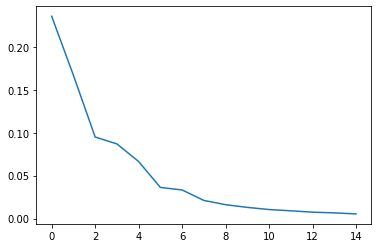

In [249]:
pd.Series(losses).plot()

In [250]:
a

tensor([[0.0583],
        [0.0715],
        [0.0869]], grad_fn=<SigmoidBackward>)

In [223]:
loss

tensor(0.0071, grad_fn=<MeanBackward0>)

----------------------
label:  [0]


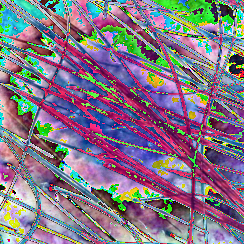

In [236]:
mds.display_sample(1)

<AxesSubplot:>

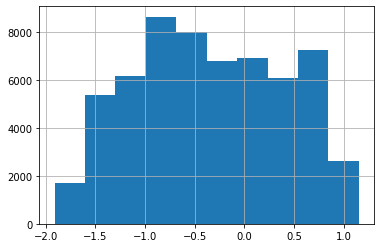

In [252]:
pd.Series(mds[1][0][0].view(-1,).numpy()).hist() # Are we normalizing with the correct values?